In [62]:
import fuzzylite as fl
import numpy as np

from src.common.generalized_helpers import (generate_var_terms, _generate_bin_name, plot_variable)

In [3]:
first_cl = fl.InputVariable(
            name="first",
            enabled=True,
            minimum=0.0,
            maximum=1.0,
            lock_range=False,
            terms=generate_var_terms(universe=(0, 1), trapezoid_points=(0, 1), n_terms=5))

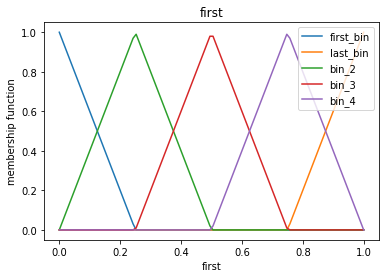

In [4]:
plot_variable(first_cl)

In [59]:
first_cl_new = fl.InputVariable(
            name="first",
            enabled=True,
            minimum=0.0,
            maximum=1.0,
            lock_range=False,
            terms=[fl.PiShape('first_bin',-1, top_right=0, top_left=0, bottom_right=.25, height=1), 
                   fl.PiShape('bin_2',0, top_right=.25, top_left=0.25, bottom_right=.5, height=1),])

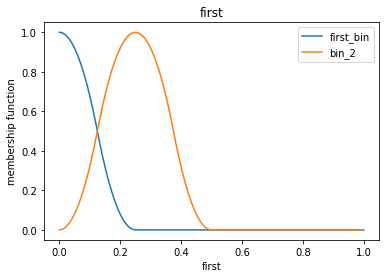

In [60]:
plot_variable(first_cl_new, universe=(0, 1))

In [63]:
def generate_var_terms(universe: tuple[float], trapezoid_points: tuple[float], n_terms: int = 4, type: str='trapezoid') -> list[fl.Term]:
    """Generates terms given universe, trapezoid points and number of term

    Args:
        universe (tuple[float]): general universe of the variable
        trapezoid_points (tuple[float]): left/right 
        n_terms (int, optional): Number of terms. Defaults to 4.

    Returns:
        list[fl.Term]: list of terms
    """
    points = np.linspace(trapezoid_points[0], trapezoid_points[1], n_terms)

    if type == 'trapezoid':
        terms = [fl.Trapezoid("first_bin", universe[0] - 1, universe[0], points[0], points[1]),
             fl.Trapezoid("last_bin", points[-2], points[-1], universe[1], universe[1] + 1),]
        if len(points) > 2: 
            for i in range(n_terms - 2):
                index = i + 2
                term = fl.Triangle(f'bin_{index}', points[i], points[i + 1], points[i + 2])
                terms.append(term)
    elif type == 'bell': 
        terms = [fl.PiShape("first_bin", universe[0] - 1, top_left=universe[0], top_right=points[0], bottom_right=points[1]),
             fl.PiShape("last_bin", points[-2], top_left= points[-1], top_right= universe[1],  bottom_right= universe[1] + 1),]
        
        if len(points) > 2: 
            for i in range(n_terms - 2):
                index = i + 2
                term = fl.PiShape(f'bin_{index}', points[i], points[i + 1], points[i + 1], points[i + 2])
                terms.append(term)
    
   
    return terms

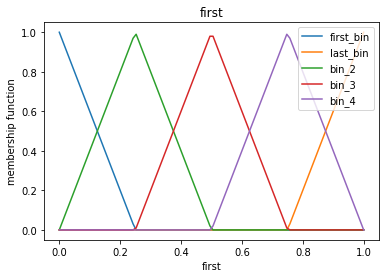

In [65]:
first_cl = fl.InputVariable(
            name="first",
            enabled=True,
            minimum=0.0,
            maximum=1.0,
            lock_range=False,
            terms=generate_var_terms(universe=(0, 1), trapezoid_points=(0, 1), n_terms=5))
plot_variable(first_cl)

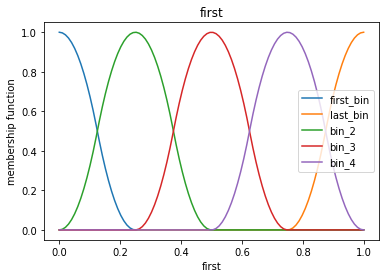

In [66]:
first_cl = fl.InputVariable(
            name="first",
            enabled=True,
            minimum=0.0,
            maximum=1.0,
            lock_range=False,
            terms=generate_var_terms(universe=(0, 1), trapezoid_points=(0, 1), n_terms=5, type='bell'))
plot_variable(first_cl)

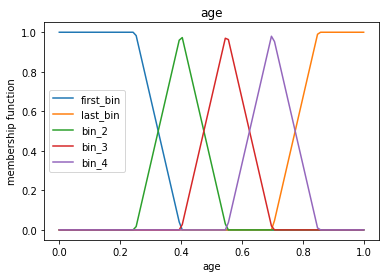

In [68]:
age = fl.InputVariable('age', enabled=True, minimum=0, maximum=1, 
                           terms=generate_var_terms(universe=(0, 1), trapezoid_points=(.25, .85), n_terms=5))
plot_variable(age)

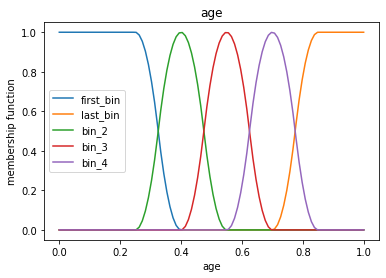

In [69]:
age = fl.InputVariable('age', enabled=True, minimum=0, maximum=1, 
                           terms=generate_var_terms(universe=(0, 1), trapezoid_points=(.25, .85), n_terms=5, type='bell'))
plot_variable(age)